In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import confusion_matrix

DEBUG=False
TS=0.3  # Testing size
RS=420  # Random State

In [34]:
# Read the data
data = pd.read_csv("winequality-red.csv", sep=";")

if DEBUG:
    print(data.head())
    print(data.describe())

In [14]:
# Split the data
np_data = data.to_numpy()
X = np_data[:,:11]
y = np_data[:,11]

In [15]:
if DEBUG:
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")

At least two different classification methods covered in this course should be used. One of the following three methods must be used:
- [] Support Vector Machine method
- [] Artificial Neural Networks method
- [x] Random Forest method.

## Random Forest method

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TS, random_state=RS)

# Change the y values to binary classification
y_train = np.array([-1 if yt < 5.5 else 1 for yt in y_train])
y_test = np.array([-1 if yt < 5.5 else 1 for yt in y_test])

if DEBUG:
    print(y_train.min())
    print(y_train.max())
    print(y_test.min())
    print(y_test.max())

In [17]:
# Train a hyperparameterized model
param = {"n_estimators": np.arange(1, 150, 5), "max_depth": np.arange(1, 100, 10)}
rf_grid = GridSearchCV(
    RandomForestClassifier(
        random_state=RS,
        criterion="entropy"),
    param_grid=param, cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=420),
             param_grid={'max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                         'n_estimators': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146])})

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TS, random_state=RS)

# Change the y values to binary classification
y_train = np.array([-1 if yt < 5.5 else 1 for yt in y_train])
y_test = np.array([-1 if yt < 5.5 else 1 for yt in y_test])

if DEBUG:
    print(y_train.min())
    print(y_train.max())
    print(y_test.min())
    print(y_test.max())

In [19]:
print("Best parameters set found on development set:")
print(rf_grid.best_params_)
print()

# Training and Testing Accuracy
print("Optimal parameter scores:")
print(f"Training score: {rf_grid.score(X_train, y_train)}")
print(f"Testing score: {rf_grid.score(X_test, y_test)}")

Best parameters set found on development set:
{'max_depth': 31, 'n_estimators': 91}

Optimal parameter scores:
Training score: 1.0
Testing score: 0.8083333333333333


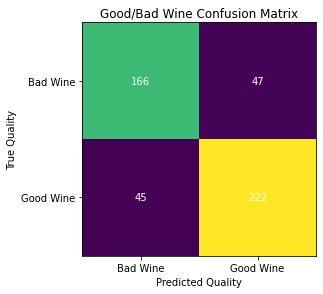

In [35]:
# Confuction Matrix
def create_confusion_matrix(c_mat):
    c_matrix = confusion_matrix(y_test, rf_grid.predict(X_test))
    fig, ax = plt.subplots()
    im = ax.imshow(c_mat)

    ax.set_xticks(np.arange(len(c_mat)))
    ax.set_yticks(np.arange(len(c_mat)))

    ax.set_xticklabels(["Bad Wine", "Good Wine"])
    ax.set_yticklabels(["Bad Wine", "Good Wine"])

    for i in range(len(c_mat)):
        for j in range(len(c_mat[i])):
            text = ax.text(j, i, c_mat[i, j],
                        ha="center", va="center", color="w")

    ax.set_title("Good/Bad Wine Confusion Matrix")
    fig.tight_layout()
    plt.xlabel("Predicted Quality")
    plt.ylabel("True Quality")
    plt.show()

c_matrix = confusion_matrix(y_test, rf_grid.predict(X_test))
create_confusion_matrix(c_matrix)

## Support Vector Machine Method

In [21]:
param = {"kernel": ["linear", "poly", "rbf", "sigmoid"]}
svm_grid = GridSearchCV(
    svm.SVC(
        random_state=RS
    ),
    param_grid=param
)
svm_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=420),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [22]:
print("Best parameters set found on development set:")
print(svm_grid.best_params_)
print()

# Training and Testing Accuracy
print("Optimal parameter scores:")
print(f"Training score: {svm_grid.score(X_train, y_train)}")
print(f"Testing score: {svm_grid.score(X_test, y_test)}")

Best parameters set found on development set:
{'kernel': 'linear'}

Optimal parameter scores:
Training score: 0.7390527256478999
Testing score: 0.7520833333333333


In [36]:
## KNN Method